In [60]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

([<matplotlib.axis.XTick at 0x15340ffeb20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

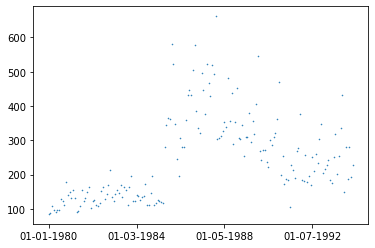

In [61]:
data = pd.read_csv('res/wine_Austral.dat',sep ='\t',usecols=['sweet','date_'])

plt.scatter(data['date_'], data['sweet'], s=0.3)
plt.xticks(data['date_'][::50])

In [62]:
x = [i for i, _ in enumerate(map(lambda s: datetime.strptime(s, '%d-%m-%Y'), data['date_']))]

normalized_x = preprocessing.normalize(np.array(x)[:, np.newaxis], axis=0).ravel()
normalized_y = preprocessing.normalize(data['sweet'][:, np.newaxis], axis=0).ravel()

<ipython-input-62-97fd97b64ba8>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalized_y = preprocessing.normalize(data['sweet'][:, np.newaxis], axis=0).ravel()


([<matplotlib.axis.XTick at 0x153411d89a0>,
 [Text(0, 0, ''), Text(0, 0, '')])

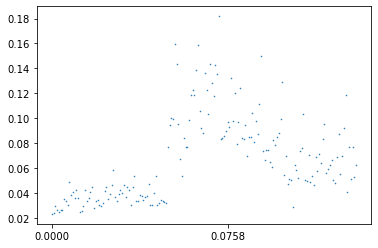

In [63]:
plt.scatter(normalized_x, normalized_y, s=0.3)
plt.xticks(normalized_x[::100])

In [64]:
model = LinearRegression()
model.fit(normalized_x[:, np.newaxis], normalized_y)

LinearRegression()

In [65]:
half_year_offset = 8
step = np.abs(normalized_x[0] - normalized_x[1])

predict_x = np.array([normalized_x[-1] + step * i for i in range(1, half_year_offset)])
predict_y = model.predict(predict_x.reshape(-1, 1))

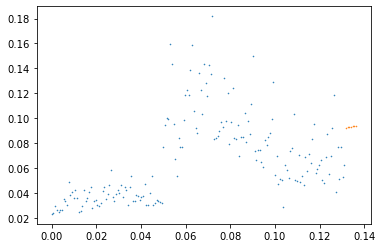

In [66]:
plt.scatter(normalized_x, normalized_y, s=0.3)

plt.scatter(predict_x, predict_y, s=0.3)